# MALL CUSTOMERS SEGMENTATION USING K-MEANS CLUSTERING

    
Problem Statement:

As the owner of a mall, it is essential to identify and understand the characteristics of our target customers in order to develop effective marketing strategies and improve customer satisfaction. By analyzing customer data and gaining insights into their preferences, behaviors, and demographics, we can enhance our ability to attract, engage, and retain customers. This, in turn, will enable us to drive footfall, increase sales, and foster long-term customer loyalty.

In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df =  df.rename(columns={'Genre':'Gender'})
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.describe()

#Observations:

# Age of the customers ranges from 18-70. This shows that the mall attracts has shops and things 
# which suite all age group people.
# Average age of customers is 39.
# Average income of customers is 60 K$.
# Average spending score of customers is 50.

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Checking for null values

df.isnull().sum()

# There are no null values in the entire dataset.

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# Checking for the dimension

df.shape

(200, 5)

In [8]:
# Checking all the datatypes in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Data Visualization

##UNIVARIATE ANALYSIS

C:\Users\Laxmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

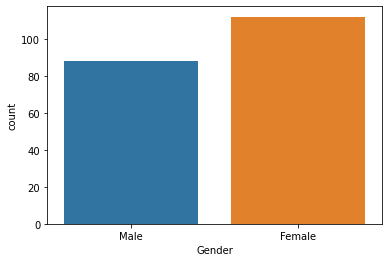

In [9]:
#GENDER

sns.countplot(df['Gender'])

# The count of females are more than males.

C:\Users\Laxmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

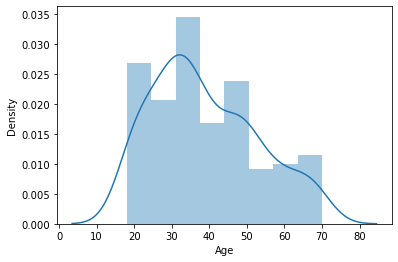

In [10]:
# AGE

sns.distplot(df['Age'])

# The age follows right skewed distribution.

C:\Users\Laxmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

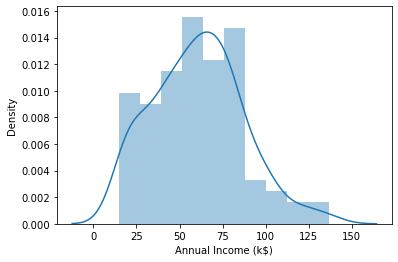

In [11]:
# Annual Income (k$)

sns.distplot(df['Annual Income (k$)'])

# Annual income follows a right skewed distribution.

C:\Users\Laxmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

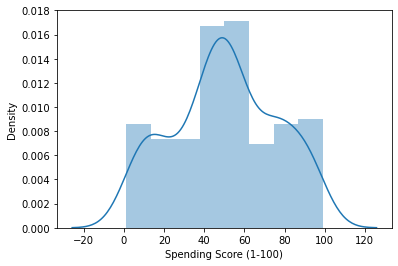

In [12]:
# Spending Score (1-100)

sns.distplot(df['Spending Score (1-100)'])

# Spending score roughly follows normal distribution.

# Bivariate Analysis

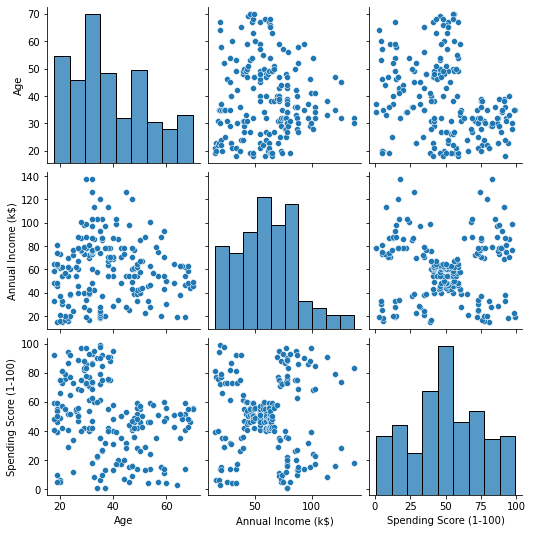

In [13]:
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']])

In [14]:
## INSIGHTS ##

# Most of the customers are in the age group of 20-40.
# Spending score is high for age group between 20-40.
# Spending score is high for people with low and high annual income.

In [15]:
# HEATMAP

# THere is no much currelation between the features. 


<AxesSubplot:>

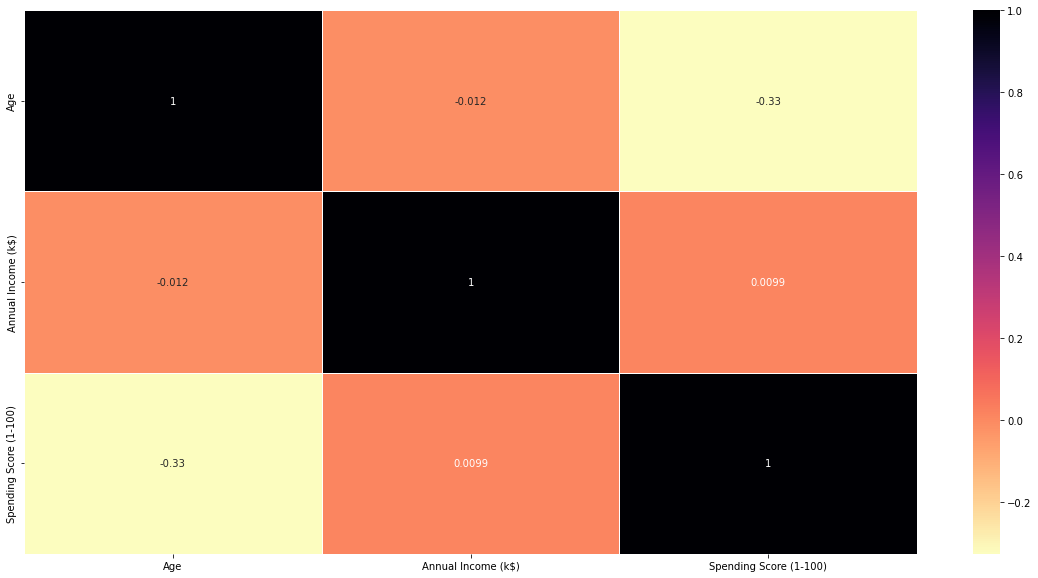

In [16]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(df[[ 'Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']].corr(), cmap = 'magma_r', annot = True, linewidths=.5)

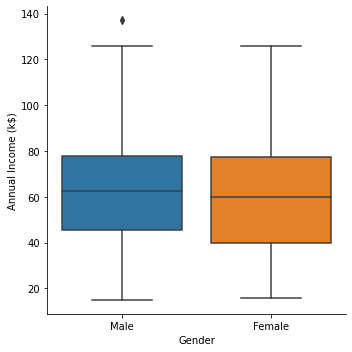

In [18]:
# BOX PLOT

# let us plot box plot between the features and understand the data in a better way.

sns.catplot(x="Gender", y="Annual Income (k$)", kind="box", data=df)

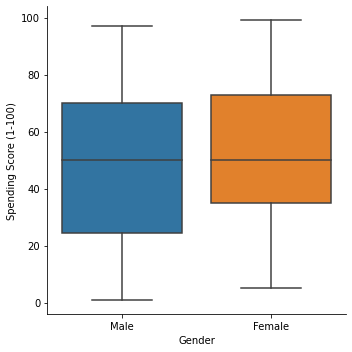

In [19]:
sns.catplot(x="Gender", y="Spending Score (1-100)", kind="box", data=df)

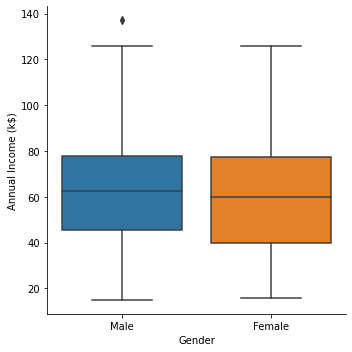

In [20]:
sns.catplot(x="Gender", y="Annual Income (k$)", kind="box", data=df)

In [21]:
# There are no much outliers in the data set.


# Feature Scaling

In [29]:
# Since clustering models are distance based we should do scaling of the data set.
data = df.iloc[:,3:5]
from sklearn.preprocessing  import StandardScaler
ss = StandardScaler()
dataset1_standardized = ss.fit_transform(data)
dataset1_standardized = pd.DataFrame(dataset1_standardized)

# K- MEANS CLUSTERING

# 1. Based on Annual Income

C:\Users\Laxmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Laxmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Laxmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Laxmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

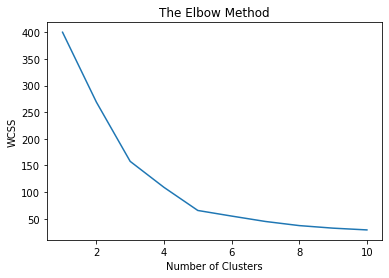

In [30]:
data1 = dataset1_standardized.values
from sklearn.cluster import KMeans
wcss=[] # within cluster sum of square
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_) #inertia_ = to find the wcss value

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#From the above figure, we can see that last most significant slope occurs at k = 5 ,
# hence we will have 5 clusters in this case.

C:\Users\Laxmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 0, 'Annual Income(K$)')

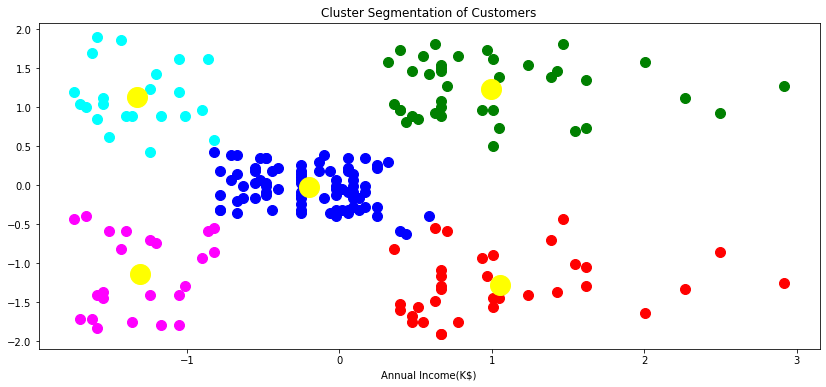

In [31]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(data1)

#plotting the the clusters
fig,ax = plt.subplots(figsize=(14,6))
ax.scatter(data1[y_kmeans==0,0],data1[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
ax.scatter(data1[y_kmeans==1,0],data1[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
ax.scatter(data1[y_kmeans==2,0],data1[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
ax.scatter(data1[y_kmeans==3,0],data1[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')
ax.scatter(data1[y_kmeans==4,0],data1[y_kmeans==4,1],s=100,c='magenta',label='Cluster 5')

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=400,c='yellow',label='Centroid')
plt.title('Cluster Segmentation of Customers')
plt.xlabel('Annual Income(K$)')

# Heirarchical Clustering

# Run Dendrogram based hierarchial clustering

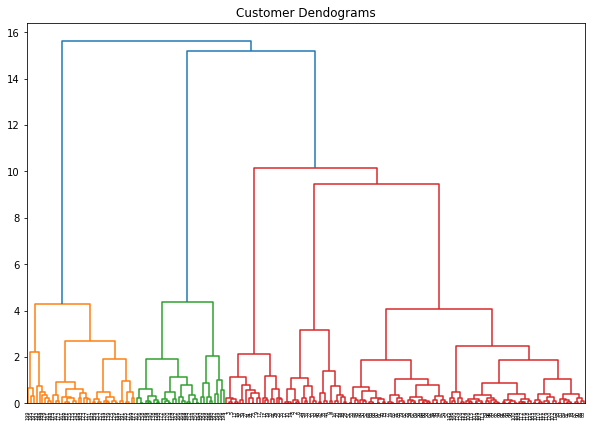

In [32]:
import scipy.cluster.hierarchy as hierarchy

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = hierarchy.dendrogram(hierarchy.linkage(data1, method='ward'))

In [34]:
# Predict the clusters for the observations

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean')  #n_clusters = k value = 5
cluster.fit_predict(data1) #unsupervised model: fit and predict apply together



array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

Text(0.5, 0, 'Annual Income(K$)')

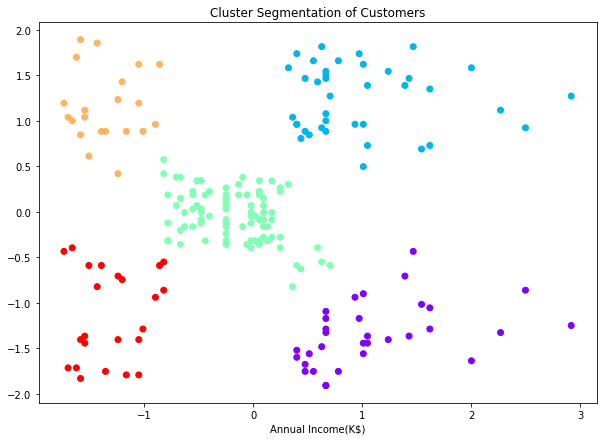

In [36]:
# Plot the clusters 

plt.figure(figsize=(10, 7))  
plt.scatter(data1[:,0], data1[:,1], c=cluster.labels_, cmap='rainbow') 
plt.title('Cluster Segmentation of Customers')
plt.xlabel('Annual Income(K$)')


# CONCLUSION